# Investment Assignment

Spark Funds wants to make investments in a few companies. The CEO of Spark Funds wants to understand the global trends in investments so that she can take the investment decisions effectively.

Spark Funds has two minor constraints for investments:

1. It wants to invest between 5 to 15 million USD per round of investment
2. It wants to invest only in English-speaking countries because of the ease of communication with the companies it would invest in



## CHECKPOINT 1

Objective: 

Load the companies and rounds data into two data frames and name them companies and rounds2 respectively.

In [107]:
# Importing libraries 
import numpy as np 
import pandas as pd

In [108]:
# Loading Data 
companies = pd.read_csv('companies.csv',encoding='ISO-8859-1')
rounds2 = pd.read_csv('rounds2.csv',encoding='ISO-8859-1')

In [109]:
companies.head()

,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/Organization/-Fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/Organization/-Qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/Organization/-The-One-Of-Them-Inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
3,/Organization/0-6-Com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
4,/Organization/004-Technologies,004 Technologies,http://004gmbh.de/en/004-interact,Software,operating,USA,IL,"Springfield, Illinois",Champaign,01-01-2010


In [110]:
# Basic Info about the Companies dataset
companies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66368 entries, 0 to 66367
Data columns (total 10 columns):
permalink        66368 non-null object
name             66367 non-null object
homepage_url     61310 non-null object
category_list    63220 non-null object
status           66368 non-null object
country_code     59410 non-null object
state_code       57821 non-null object
region           58338 non-null object
city             58340 non-null object
founded_at       51147 non-null object
dtypes: object(10)
memory usage: 5.1+ MB


In [111]:
# The column 'permalink' depicts the Unique ID of each company 
companies['permalink'].nunique()

66368

In [112]:
rounds2.head()

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0
1,/ORGANIZATION/-QOUNTER,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0
3,/ORGANIZATION/-THE-ONE-OF-THEM-INC-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0


In [113]:
# Basic info about the Rounds2 dataset
rounds2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 114949 entries, 0 to 114948
Data columns (total 6 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
dtypes: float64(1), object(5)
memory usage: 5.3+ MB


In [114]:
# The column 'company_permalink' depicts the Unique ID of each company 
rounds2['company_permalink'].nunique()

90247

In [115]:
# Changing the Unique Key values of both the dataframes into a common alphabet case (lower-case)
rounds2['company_permalink'] = rounds2['company_permalink'].str.lower()
companies['permalink'] = companies['permalink'].str.lower()

In [116]:
# Creating the master_frame
master_frame = pd.merge(rounds2, companies, left_on='company_permalink', right_on='permalink', how='left')

In [117]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funding_round_code,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,B,05-01-2015,10000000.0,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN
1,/organization/-qounter,/funding-round/22dacff496eb7acb2b901dec1dfe5633,venture,A,14-10-2014,NaN,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,NaN,01-03-2014,700000.0,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,B,30-01-2014,3406878.0,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,A,19-03-2008,2000000.0,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,NaN,01-03-2014,41313.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,NaN,01-05-2013,32842.0,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012
114946,/organization/ãeron,/funding-round/59f4dce44723b794f21ded3daed6e4fe,venture,A,01-08-2014,NaN,/organization/ãeron,ÃERON,http://www.aeron.hu/,NaN,operating,NaN,NaN,NaN,NaN,01-01-2011
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,NaN,01-01-2015,18192.0,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014


In [118]:
# Basic Info about the master_frame
master_frame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114949 entries, 0 to 114948
Data columns (total 16 columns):
company_permalink          114949 non-null object
funding_round_permalink    114949 non-null object
funding_round_type         114949 non-null object
funding_round_code         31140 non-null object
funded_at                  114949 non-null object
raised_amount_usd          94959 non-null float64
permalink                  114942 non-null object
name                       114941 non-null object
homepage_url               108810 non-null object
category_list              111535 non-null object
status                     114942 non-null object
country_code               106271 non-null object
state_code                 104003 non-null object
region                     104782 non-null object
city                       104785 non-null object
founded_at                 94422 non-null object
dtypes: float64(1), object(15)
memory usage: 14.9+ MB


In [119]:
master_frame['company_permalink'].nunique()

66370

## Results for Checkpoint 1

**How many unique companies are present in rounds2?** - *90247*

**How many unique companies are present in companies?** - *66368*

**In the companies data frame, which column can be used as the unique key for each company? Write the name of the column.** - *\"permalink"*

**Are there any companies in the rounds2 file which are not present in companies? Answer yes or no: Y/N** - *Y*

**Merge the two data frames so that all variables (columns) in the companies frame are added to the rounds2 data frame. Name the merged frame master_frame. How many observations are present in master_frame?** - *114949*

## CHECKPOINT 2

Objective : 

Calculate the most representative value of the investment amount for each of the four funding types (venture, angel, seed, and private equity) and report the answers in Table 2.1

Based on the most representative investment amount calculated above, which investment type do you think is the most suitable for Spark Funds?

In [120]:
# Converting the values in the raised_amount_usd to millions 
master_frame['raised_amount_usd'] = master_frame['raised_amount_usd']/1000000
# Statistics of the master_frame
master_frame.describe()

,raised_amount_usd
count,94959.000000
mean,10.426869
std,114.821248
min,0.000000
25%,0.322500
50%,1.680511
75%,7.000000
max,21271.935000


In [121]:
# Finding the percentage of missing values in each column
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funding_round_code         72.91
funded_at                   0.00
raised_amount_usd          17.39
permalink                   0.01
name                        0.01
homepage_url                5.34
category_list               2.97
status                      0.01
country_code                7.55
state_code                  9.52
region                      8.84
city                        8.84
founded_at                 17.86
dtype: float64

In [122]:
# Dropping the column funding_round_code as it contains a large number of missing values
master_frame = master_frame.drop('funding_round_code', axis=1)

In [123]:
# No. of rows that have more than 5 missing values
len(master_frame[master_frame.isnull().sum(axis=1) > 5].index)

2832

In [124]:
# The percentage of rows that contain more than 5 missing values 
100*(len(master_frame[master_frame.isnull().sum(axis=1) > 5].index) / len(master_frame.index))

2.463701293617169

In [125]:
# retaining the rows having <= 5 NaNs
master_frame = master_frame[master_frame.isnull().sum(axis=1) <= 5]

# look at the percentage of missing values in each column again
round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd          16.14
permalink                   0.00
name                        0.00
homepage_url                4.18
category_list               1.66
status                      0.00
country_code                5.24
state_code                  7.24
region                      6.54
city                        6.54
founded_at                 16.23
dtype: float64

***As we are going to work with the column "raised_amount_usd", we will remove the missing values of the column.***

In [126]:
# Removing missing values in "raised_amount_usd" column
master_frame = master_frame[~np.isnan(master_frame['raised_amount_usd'])]

round(100*(master_frame.isnull().sum()/len(master_frame.index)), 2)

company_permalink           0.00
funding_round_permalink     0.00
funding_round_type          0.00
funded_at                   0.00
raised_amount_usd           0.00
permalink                   0.00
name                        0.00
homepage_url                3.76
category_list               0.76
status                      0.00
country_code                5.23
state_code                  7.09
region                      6.50
city                        6.50
founded_at                 16.02
dtype: float64

In [127]:
master_frame.describe()

,raised_amount_usd
count,94025.000000
mean,10.407722
std,115.320900
min,0.000000
25%,0.325000
50%,1.682988
75%,7.000000
max,21271.935000


**Notice that the minimum is 0, max is 21271 million, the mean is 10.4 million and median (50%) is 1.68 million. There's a significant variation in the 25th and the 75th percentile as well (0.32 million to 7 million).** 

***The mean is directly influenced the max value, so we can't take the mean as the most representative value of the investment amount and hence we take the median (1.68 million) as the the most representative value of the investment amount.***

In [128]:
# Finding out the most representative value of the invested amount for the "venture" type companies
master_frame[master_frame['funding_round_type']=='venture'].describe()

,raised_amount_usd
count,49756.000000
mean,11.720930
std,86.707325
min,0.000000
25%,1.600000
50%,5.000000
75%,12.000000
max,17600.000000


***As the most representative value is the median, we take the average funding of "venture" type = 5 million***

In [129]:
# Finding out the most representative value of the invested amount for the "seed" type companies
master_frame[master_frame['funding_round_type']=='seed'].describe()

,raised_amount_usd
count,23352.000000
mean,0.724315
std,2.232349
min,0.000000
25%,0.060000
50%,0.281478
75%,1.000000
max,200.000000


***As the most representative value is the median, we take the average funding of "seed" type = 0.28 million***

In [130]:
# Finding out the most representative value of the invested amount for the "angel" type companies
master_frame[master_frame['funding_round_type']=='angel'].describe()

,raised_amount_usd
count,4847.000000
mean,0.959636
std,7.414247
min,0.000000
25%,0.150000
50%,0.400000
75%,1.000000
max,494.511992


***As the most representative value is the median, we take the average funding of "angel" type = 0.4 million***

In [131]:
# Finding out the most representative value of the invested amount for the "private_equity" type companies
master_frame[master_frame['funding_round_type']=='private_equity'].describe()

,raised_amount_usd
count,1911.000000
mean,73.086735
std,198.861383
min,0.000000
25%,5.000000
50%,20.000000
75%,75.000000
max,4745.460219


***As the most representative value is the median, we take the average funding of "private_equity" type = 20 million***

## Results for Checkpoint 2

**1. Average funding amount of venture type -** *5 million*

**2. Average funding amount of angel type -** *0.4 million* 

**3. Average funding amount of seed type -** *0.28 million* 

**4. Average funding amount of private equity type -** *20 million* 

**5. Considering that Spark Funds wants to invest between 5 to 15 million USD per  investment round, which investment type is the most suitable for them? -** *\"VENTURE TYPE"*

## CHECKPOINT 3

Objective : 

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [132]:
# Now, finding the top 3 english speaking countries with funding type as "venture"
master_frame_venture = master_frame[master_frame['funding_round_type']=='venture']

In [133]:
# Creating the top9 dataframe 
top9 = master_frame_venture.sort_values(by='raised_amount_usd',ascending=False)
top9_country = top9.groupby('country_code')
top9_country['raised_amount_usd'].sum().sort_values(ascending=False)[:9]

country_code
USA    422510.842796
CHN     39835.418773
GBR     20234.971737
IND     14391.858718
CAN      9583.332317
FRA      7259.536732
ISR      6905.014579
DEU      6346.959822
JPN      3363.676611
Name: raised_amount_usd, dtype: float64

In [134]:
# Grouping the top9 dataframe by the country-code
top9_country = top9.groupby('country_code')

In [135]:
# Calculaing the top 9 countries with high amount of investment
top9_country['raised_amount_usd'].sum().sort_values(ascending=False)[:9]

country_code
USA    422510.842796
CHN     39835.418773
GBR     20234.971737
IND     14391.858718
CAN      9583.332317
FRA      7259.536732
ISR      6905.014579
DEU      6346.959822
JPN      3363.676611
Name: raised_amount_usd, dtype: float64

The countries that have english as an official language in the above 9 countries are USA, GBR, IND, CAN, ISR. 



## Results for Checkpoint 3

In these the top 3 english speaking countries with high amount of investment are

**1. USA - United States of America**

**2. GBR - Unikted Kingdom**

**3. IND - India** 

## CHECKPOINT 4

Objective : 

Spark Funds wants to see the top nine countries which have received the highest total funding (across ALL sectors for the chosen investment type)

For the chosen investment type, make a data frame named top9 with the top nine countries (based on the total investment amount each country has received)

In [136]:
# Extracting the primary sector from the category_list
master_frame['primary_sector'] = master_frame['category_list'].apply(lambda x : str(x).split('|')[0])

In [137]:
master_frame

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at,primary_sector
0,/organization/-fame,/funding-round/9a01d05418af9f794eebff7ace91f638,venture,05-01-2015,10.000000,/organization/-fame,#fame,http://livfame.com,Media,operating,IND,16,Mumbai,Mumbai,NaN,Media
2,/organization/-qounter,/funding-round/b44fbb94153f6cdef13083530bb48030,seed,01-03-2014,0.700000,/organization/-qounter,:Qounter,http://www.qounter.com,Application Platforms|Real Time|Social Network...,operating,USA,DE,DE - Other,Delaware City,04-09-2014,Application Platforms
3,/organization/-the-one-of-them-inc-,/funding-round/650b8f704416801069bb178a1418776b,venture,30-01-2014,3.406878,/organization/-the-one-of-them-inc-,"(THE) ONE of THEM,Inc.",http://oneofthem.jp,Apps|Games|Mobile,operating,NaN,NaN,NaN,NaN,NaN,Apps
4,/organization/0-6-com,/funding-round/5727accaeaa57461bd22a9bdd945382d,venture,19-03-2008,2.000000,/organization/0-6-com,0-6.com,http://www.0-6.com,Curated Web,operating,CHN,22,Beijing,Beijing,01-01-2007,Curated Web
6,/organization/01games-technology,/funding-round/7d53696f2b4f607a2f2a8cbb83d01839,undisclosed,01-07-2014,0.041250,/organization/01games-technology,01Games Technology,http://www.01games.hk/,Games,operating,HKG,NaN,Hong Kong,Hong Kong,NaN,Games
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
114943,/organization/zzzzapp-com,/funding-round/6ba41360588bc6e3f77e9b50a0ebfafa,seed,01-08-2013,0.033149,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising
114944,/organization/zzzzapp-com,/funding-round/8f6d25b8ee4199e586484d817bceda05,convertible_note,01-03-2014,0.041313,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising
114945,/organization/zzzzapp-com,/funding-round/ff1aa06ed5da186c84f101549035d4ae,seed,01-05-2013,0.032842,/organization/zzzzapp-com,Zzzzapp Wireless ltd.,http://www.zzzzapp.com,Advertising|Mobile|Web Development|Wireless,operating,HRV,15,Split,Split,13-05-2012,Advertising
114947,/organization/ãasys-2,/funding-round/35f09d0794651719b02bbfd859ba9ff5,seed,01-01-2015,0.018192,/organization/ãasys-2,Ãasys,http://www.oasys.io/,Consumer Electronics|Internet of Things|Teleco...,operating,USA,CA,SF Bay Area,San Francisco,01-01-2014,Consumer Electronics


In [138]:
# Loading the mapping data 
mapping = pd.read_csv('mapping.csv')

In [139]:
mapping.head()

,category_list,Automotive & Sports,Blanks,Cleantech / Semiconductors,Entertainment,Health,Manufacturing,"News, Search and Messaging",Others,"Social, Finance, Analytics, Advertising"
0,NaN,0,1,0,0,0,0,0,0,0
1,3D,0,0,0,0,0,1,0,0,0
2,3D Printing,0,0,0,0,0,1,0,0,0
3,3D Technology,0,0,0,0,0,1,0,0,0
4,Accounting,0,0,0,0,0,0,0,0,1


In [140]:
# Basic info about the mapping dataset
mapping.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 688 entries, 0 to 687
Data columns (total 10 columns):
category_list                              687 non-null object
Automotive & Sports                        688 non-null int64
Blanks                                     688 non-null int64
Cleantech / Semiconductors                 688 non-null int64
Entertainment                              688 non-null int64
Health                                     688 non-null int64
Manufacturing                              688 non-null int64
News, Search and Messaging                 688 non-null int64
Others                                     688 non-null int64
Social, Finance, Analytics, Advertising    688 non-null int64
dtypes: int64(9), object(1)
memory usage: 53.9+ KB


In [141]:
# Merging the mapping and the master_frame dataset
master_frame_new = pd.merge(master_frame,mapping,how='inner',left_on='primary_sector',right_on='category_list')

In [142]:
# Now mapping the one hot encoding mapping dataframe to the master_frame and the main_sector is extracted
master_frame_final = pd.melt(master_frame_new,id_vars =['company_permalink', 'funding_round_permalink', 'funding_round_type','funded_at', 'raised_amount_usd', 'permalink', 'name', 'homepage_url','category_list_x', 'status', 'country_code', 'state_code', 'region','city', 'founded_at', 'primary_sector', 'category_list_y'], value_vars =['Automotive & Sports','Blanks','Cleantech / Semiconductors','Entertainment','Health','Manufacturing','News, Search and Messaging','Others','Social, Finance, Analytics, Advertising'],  var_name ='main_sector', value_name ='Value') 
master_frame_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 779544 entries, 0 to 779543
Data columns (total 19 columns):
company_permalink          779544 non-null object
funding_round_permalink    779544 non-null object
funding_round_type         779544 non-null object
funded_at                  779544 non-null object
raised_amount_usd          779544 non-null float64
permalink                  779544 non-null object
name                       779535 non-null object
homepage_url               750375 non-null object
category_list_x            779544 non-null object
status                     779544 non-null object
country_code               739152 non-null object
state_code                 724833 non-null object
region                     729036 non-null object
city                       729063 non-null object
founded_at                 653319 non-null object
primary_sector             779544 non-null object
category_list_y            779544 non-null object
main_sector                779544 non-

In [143]:
# The null values of the the column "Value" are removed
master_frame_final = master_frame_final[master_frame_final['Value']==1]

In [144]:
# Dropping the "Value" column
master_frame_final.drop('Value',axis=1,inplace=True)

In [145]:
master_frame_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86616 entries, 47134 to 779531
Data columns (total 18 columns):
company_permalink          86616 non-null object
funding_round_permalink    86616 non-null object
funding_round_type         86616 non-null object
funded_at                  86616 non-null object
raised_amount_usd          86616 non-null float64
permalink                  86616 non-null object
name                       86615 non-null object
homepage_url               83375 non-null object
category_list_x            86616 non-null object
status                     86616 non-null object
country_code               82128 non-null object
state_code                 80537 non-null object
region                     81004 non-null object
city                       81007 non-null object
founded_at                 72591 non-null object
primary_sector             86616 non-null object
category_list_y            86616 non-null object
main_sector                86616 non-null object
dty

In [146]:
# Filtering the master_frame based on the desirable Funding type
aster_frame_final = master_frame_final[master_frame_final['funding_round_type']=='venture']

In [147]:
master_frame_final.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
47134,/organization/1871,/funding-round/eb9aa2a41fe562fa69053d43d39f26f2,grant,17-06-2014,2.500000,/organization/1871,1871,http://www.1871.com,Designers|Internet|Non Profit|Startups,operating,USA,IL,Chicago,Chicago,NaN,Designers,Designers,Automotive & Sports
47135,/organization/artsetters,/funding-round/008c2a76bdf0ee640c2bcc355a2f97ff,seed,30-09-2014,1.000000,/organization/artsetters,ArtSetters,http://www.ArtSetters.com,Designers|Marketplaces|Retail,operating,USA,NY,New York City,New York,05-07-2013,Designers,Designers,Automotive & Sports
47136,/organization/big-dipper-studio,/funding-round/372399535cafa7e0e02d0b4a290924d5,undisclosed,01-08-2015,0.041250,/organization/big-dipper-studio,Big Dipper Studio,http://www.bigdipperstudio.com/,Designers|Service Providers|Web Development,operating,HKG,NaN,HKG - Other,Sha Tin,NaN,Designers,Designers,Automotive & Sports
47137,/organization/chic-by-choice,/funding-round/955a32898f21001e3d54a5b4140baf80,venture,30-11-2015,1.588517,/organization/chic-by-choice,Chic by Choice,http://chic-by-choice.com,Designers|E-Commerce|Fashion|Jewelry,operating,GBR,H9,London,London,NaN,Designers,Designers,Automotive & Sports
47138,/organization/chic-by-choice,/funding-round/fc4368fa17da9a43230bd19b975fb0e2,seed,16-06-2014,0.677448,/organization/chic-by-choice,Chic by Choice,http://chic-by-choice.com,Designers|E-Commerce|Fashion|Jewelry,operating,GBR,H9,London,London,NaN,Designers,Designers,Automotive & Sports


## CHECKPOINT 5

Objective :

Create three separate data frames D1, D2 and D3 for each of the three countries containing the observations of funding type FT falling within the 5-15 million USD range. The three data frames should contain:

All the columns of the master_frame along with the primary sector and the main sector

The total number (or count) of investments for each main sector in a separate column

The total amount invested in each main sector in a separate column

In [148]:
# Filtering the companies with funding amount more than 5 million
master_frame_final = master_frame_final[master_frame_final['raised_amount_usd']>=5]

In [149]:
# Filtering the companies with funding amount less than 15 million
master_frame_final = master_frame_final[master_frame_final['raised_amount_usd']<=15]

In [150]:
# Sorting the master_frame by the "raised_amount_usd"
master_frame_final.sort_values(by = 'raised_amount_usd')

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
779530,/organization/thredhq,/funding-round/54166cbfbb75fb604c17a94f2205570e,venture,18-09-2013,5.0,/organization/thredhq,Thredhq,https://thredhq.com/,Social + Mobile + Local|Social Network Media,operating,USA,CA,SF Bay Area,Berkeley,01-01-2012,Social + Mobile + Local,Social + Mobile + Local,"Social, Finance, Analytics, Advertising"
188814,/organization/sqz-biotech,/funding-round/6e26557e83f4f43d54510a991caf93d6,venture,24-06-2015,5.0,/organization/sqz-biotech,SQZ Biotech,http://sqzbiotech.com,Biotechnology,operating,USA,MA,Boston,Somerville,01-01-2013,Biotechnology,Biotechnology,Cleantech / Semiconductors
628556,/organization/pepperfry-com,/funding-round/6b0417be8e2dfc535ef173d7d82272d8,venture,12-12-2011,5.0,/organization/pepperfry-com,Pepperfry.com,http://www.pepperfry.com,E-Commerce,operating,IND,16,Mumbai,Mumbai,01-01-2011,E-Commerce,E-Commerce,Others
628548,/organization/peek-kids,/funding-round/13751d0ec31950df02dba69d661178ec,venture,07-04-2009,5.0,/organization/peek-kids,Peek Kids,http://peekkids.com,E-Commerce,operating,USA,CA,SF Bay Area,San Francisco,01-01-2006,E-Commerce,E-Commerce,Others
628543,/organization/peatix,/funding-round/db8db40dfc193923d7ce04a4cb115a7a,venture,16-03-2015,5.0,/organization/peatix,Peatix,http://peatix.com,E-Commerce,operating,USA,NY,New York City,New York,01-05-2011,E-Commerce,E-Commerce,Others
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181886,/organization/biodesy,/funding-round/7113071c45050b4483f98e1685203455,venture,17-10-2013,15.0,/organization/biodesy,Biodesy,http://www.biodesy.com,Biotechnology,operating,USA,CA,SF Bay Area,Burlingame,01-01-2013,Biotechnology,Biotechnology,Cleantech / Semiconductors
736051,/organization/rewardstyle,/funding-round/e1ca79a64dc69018eaabad3e782c8772,venture,30-06-2015,15.0,/organization/rewardstyle,rewardStyle,http://rewardStyle.com,Advertising,operating,USA,TX,Dallas,Dallas,01-06-2011,Advertising,Advertising,"Social, Finance, Analytics, Advertising"
524207,/organization/sencha,/funding-round/f08d957ffcbd273cda1f9675f0a773e9,venture,24-10-2011,15.0,/organization/sencha,Sencha,http://www.sencha.com,Curated Web|Enterprise Software|Mobile|Open So...,operating,USA,CA,SF Bay Area,Redwood City,01-04-2007,Curated Web,Curated Web,"News, Search and Messaging"
221761,/organization/nexterra,/funding-round/6449b72c84d6b5d154c75e7a1603a8c7,venture,02-03-2011,15.0,/organization/nexterra,Nexterra,http://www.nexterra.ca,Clean Technology,operating,CAN,BC,Vancouver,Vancouver,NaN,Clean Technology,Clean Technology,Cleantech / Semiconductors


### Country 1 - USA

In [151]:
# Filtering the master_frame with country-code = 'USA'
d1 = master_frame_final[master_frame_final['country_code'] == 'USA']
d1.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
47139,/organization/design-within-reach,/funding-round/a28410569e71d10d0113c8a1400853bf,venture,14-08-2009,15.0,/organization/design-within-reach,Design Within Reach,http://www.dwr.com,Designers|E-Commerce|Indoor Positioning|Retail,acquired,USA,CT,Hartford,Stamford,01-01-1998,Designers,Designers,Automotive & Sports
47141,/organization/eloquii,/funding-round/379dedadf504acdc4ba74e2323f9d4c9,venture,02-12-2014,6.0,/organization/eloquii,Eloquii,http://www.eloquii.com/,Designers|Fashion|Retail,operating,USA,NY,New York City,New York,01-01-2014,Designers,Designers,Automotive & Sports
47149,/organization/reelstyle,/funding-round/b34b76fccd07ccd7ec2e3fda835d7427,seed,31-01-2015,8.0,/organization/reelstyle,ReelStyle,http://www.ReelStyle.co,Designers|Internet Marketing|Online Shopping|P...,operating,USA,CA,Los Angeles,Santa Monica,01-11-2014,Designers,Designers,Automotive & Sports
47150,/organization/reelstyle,/funding-round/e0e110dcc32b7d9e36dff8a38d604d16,seed,31-01-2015,8.0,/organization/reelstyle,ReelStyle,http://www.ReelStyle.co,Designers|Internet Marketing|Online Shopping|P...,operating,USA,CA,Los Angeles,Santa Monica,01-11-2014,Designers,Designers,Automotive & Sports
47151,/organization/stio,/funding-round/04ef84b601b00fca1b1405dc2edd94d5,venture,04-08-2014,5.9,/organization/stio,Stio,http://www.stio.com/,Designers,operating,USA,MI,Grand Rapids,Wyoming,01-01-2011,Designers,Designers,Automotive & Sports


In [152]:
# Grouping by the main_sector
d1_groupby = d1.groupby('main_sector')
# Calculating the total no of investments for each main_sector
d1_count = d1_groupby['raised_amount_usd'].count()
# Calculating the total amount of investments for each main_sector
d1_sum = d1_groupby['raised_amount_usd'].sum()

# Calculatng the total no of investments in 'USA'
Total_no_of_investments_USA = d1_count.sum()
# Calculatng the total amount of investments in 'USA'
Total_amount_of_investments_USA = d1_sum.sum()

print('Total no of investments in USA'+' = '+str(Total_no_of_investments_USA))
print('Total amount of investments in USA'+' = '+str(Total_amount_of_investments_USA)+' millions')

Total no of investments in USA = 12668
Total amount of investments in USA = 112378.342309 millions


In [153]:
# Creating a separate column for total no. of investments in each main sector
d1['Total no of Investments'] = d1['main_sector'].map(d1_count)
# Creating a separate column for total amount of investments in each main sector
d1['Total amount of Investment'] = d1['main_sector'].map(d1_sum)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [154]:
d1

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment
47139,/organization/design-within-reach,/funding-round/a28410569e71d10d0113c8a1400853bf,venture,14-08-2009,15.0,/organization/design-within-reach,Design Within Reach,http://www.dwr.com,Designers|E-Commerce|Indoor Positioning|Retail,acquired,USA,CT,Hartford,Stamford,01-01-1998,Designers,Designers,Automotive & Sports,195,1678.993953
47141,/organization/eloquii,/funding-round/379dedadf504acdc4ba74e2323f9d4c9,venture,02-12-2014,6.0,/organization/eloquii,Eloquii,http://www.eloquii.com/,Designers|Fashion|Retail,operating,USA,NY,New York City,New York,01-01-2014,Designers,Designers,Automotive & Sports,195,1678.993953
47149,/organization/reelstyle,/funding-round/b34b76fccd07ccd7ec2e3fda835d7427,seed,31-01-2015,8.0,/organization/reelstyle,ReelStyle,http://www.ReelStyle.co,Designers|Internet Marketing|Online Shopping|P...,operating,USA,CA,Los Angeles,Santa Monica,01-11-2014,Designers,Designers,Automotive & Sports,195,1678.993953
47150,/organization/reelstyle,/funding-round/e0e110dcc32b7d9e36dff8a38d604d16,seed,31-01-2015,8.0,/organization/reelstyle,ReelStyle,http://www.ReelStyle.co,Designers|Internet Marketing|Online Shopping|P...,operating,USA,CA,Los Angeles,Santa Monica,01-11-2014,Designers,Designers,Automotive & Sports,195,1678.993953
47151,/organization/stio,/funding-round/04ef84b601b00fca1b1405dc2edd94d5,venture,04-08-2014,5.9,/organization/stio,Stio,http://www.stio.com/,Designers,operating,USA,MI,Grand Rapids,Wyoming,01-01-2011,Designers,Designers,Automotive & Sports,195,1678.993953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779462,/organization/perceptis,/funding-round/200b2f011310921c2859bc6a6343cec6,venture,09-09-2010,6.0,/organization/perceptis,Perceptis,http://www.perceptis.com,BPO Services|Consulting|Contact Centers|Custom...,acquired,USA,SC,Greenville - Spartanburg,Greenville,01-05-2004,BPO Services,BPO Services,"Social, Finance, Analytics, Advertising",2086,18061.197771
779465,/organization/secureone-data-solutions,/funding-round/7a72557928defecba89eee980fb3b51a,venture,03-10-2007,12.0,/organization/secureone-data-solutions,SecureOne Data Solutions,http://www.secure1data.com,BPO Services|Databases|Web Design,operating,USA,NY,Long Island,Stony Brook,01-01-1978,BPO Services,BPO Services,"Social, Finance, Analytics, Advertising",2086,18061.197771
779504,/organization/silverback-enterprise-group-inc,/funding-round/3e38df9cb1d23093c7322b22fb0c99d8,seed,03-11-2010,11.5,/organization/silverback-enterprise-group-inc,"Silverback Enterprise Group, Inc.",http://silverbackeg.com/index.html,Enterprise Purchasing|Enterprise Software|Soft...,operating,USA,TX,Austin,Austin,01-01-2010,Enterprise Purchasing,Enterprise Purchasing,"Social, Finance, Analytics, Advertising",2086,18061.197771
779526,/organization/thisnext,/funding-round/3ba5a2f756c9754968fc1c1638f4f415,venture,01-01-2008,5.0,/organization/thisnext,ThisNext,http://www.thisnext.com,Social Buying|Social Media,operating,USA,CA,Los Angeles,Santa Monica,01-12-2005,Social Buying,Social Buying,"Social, Finance, Analytics, Advertising",2086,18061.197771


In [155]:
# Calculating the order of sector (Count-wise)
d1_count.sort_values(ascending = False)

main_sector
Others                                     3267
Cleantech / Semiconductors                 2792
Social, Finance, Analytics, Advertising    2086
News, Search and Messaging                 1677
Health                                     1118
Manufacturing                               900
Entertainment                               633
Automotive & Sports                         195
Name: raised_amount_usd, dtype: int64

**Top sector (based on count of investments) in USA -** *Others (3267)*

**Second-best sector (based on count of investments) in USA -** *Cleantech / Semiconductors (2792)*

**Third-best sector (based on count of investments) in USA -** *Social, Finance, Analytics, Advertising (2086)*

In [156]:
# Finding out the company which had the highest amount of investments in the top sector
d1[d1['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment
626080,/organization/1stdibs,/funding-round/292b074d073fdd9c7e9d8f372c3aa5f6,venture,24-01-2014,15.0,/organization/1stdibs,1stdibs,http://www.1stdibs.com,E-Commerce,operating,USA,NY,New York City,New York,01-01-2001,E-Commerce,E-Commerce,Others,3267,28913.998107
638244,/organization/bti-systems,/funding-round/91e9dc41a0aaa5caf928479e44d124cf,venture,06-11-2008,15.0,/organization/bti-systems,BTI Systems,http://www.btisystems.com,Software,operating,USA,MA,Boston,Littleton,01-01-2000,Software,Software,Others,3267,28913.998107
638978,/organization/deploy-solution,/funding-round/a50ee5cf561a013a5381bf0009a8f893,venture,23-11-1999,15.0,/organization/deploy-solution,Deploy Solution,http://www.deploy.com/,Software,acquired,USA,MA,Boston,Westwood,NaN,Software,Software,Others,3267,28913.998107
638954,/organization/decisyon,/funding-round/02fd3a2bbc6edac002c42a8fade60b97,venture,24-10-2012,15.0,/organization/decisyon,Decisyon,http://www.decisyon.com,Software,operating,USA,CT,Hartford,Stamford,01-01-2005,Software,Software,Others,3267,28913.998107
667046,/organization/meraki,/funding-round/767a7fa04a0adedae522d3af762c17e7,venture,07-02-2011,15.0,/organization/meraki,Meraki,http://meraki.com,Networking|Network Security,acquired,USA,CA,SF Bay Area,San Francisco,01-04-2006,Networking,Networking,Others,3267,28913.998107
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
629463,/organization/tvu-networks,/funding-round/5b30d2a0f2e6a6a7f9a5f4967d50acfe,venture,01-10-2008,5.0,/organization/tvu-networks,TVU Networks,http://www.tvupack.com/,E-Commerce|Internet TV|Media|Peer-to-Peer|Vide...,operating,USA,CA,SF Bay Area,Mountain View,01-10-2005,E-Commerce,E-Commerce,Others,3267,28913.998107
645951,/organization/vbrick-systems,/funding-round/17e1a08b34416e79d78009db48cce287,venture,11-10-2012,5.0,/organization/vbrick-systems,"VBrick Systems, Inc.",http://vbrick.com,Enterprise Software,operating,USA,VA,"Washington, D.C.",Herndon,01-01-1998,Enterprise Software,Enterprise Software,Others,3267,28913.998107
629469,/organization/twofish,/funding-round/dcb229b900504ece5c74cdb320601882,venture,01-12-2006,5.0,/organization/twofish,TwoFish,http://www.twofish.com,E-Commerce,acquired,USA,CA,SF Bay Area,Redwood City,01-01-2006,E-Commerce,E-Commerce,Others,3267,28913.998107
672066,/organization/3vr-security,/funding-round/b8b7b0c0c6ba2cd58d242d9f401a09c9,venture,15-01-2009,5.0,/organization/3vr-security,3VR,http://www.3vr.com,Security,operating,USA,CA,SF Bay Area,San Francisco,01-01-2002,Security,Security,Others,3267,28913.998107


**For the top sector count-wise, which company received the highest investment?** 

As you could see, for the top sector count-wise, the company ***\"1stdibs"*** received the highest investment.


In [157]:
# Finding out the company which had the highest amount of investments in the second-best sector
d1[d1['main_sector']=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd',ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment
259732,/organization/sunverge-energy-inc,/funding-round/2d73b074d01b5d5b1f553eb5cbd8af2c,venture,17-06-2014,15.0,/organization/sunverge-energy-inc,"Sunverge Energy, Inc",http://sunverge.com,Commercial Solar|Hardware + Software|Residenti...,operating,USA,CA,CA - Other,Stockton,01-01-2010,Commercial Solar,Commercial Solar,Cleantech / Semiconductors,2792,25524.17443
188961,/organization/symic-biomedical,/funding-round/9002393da525708be875a1eb5b200bff,venture,05-01-2015,15.0,/organization/symic-biomedical,Symic Biomedical,http://www.symicbio.com/contact/,Biotechnology,operating,USA,CA,SF Bay Area,San Francisco,01-01-2012,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
184200,/organization/forsight-labs,/funding-round/064e211f7dac4abea106bdb404baf2fc,venture,16-04-2014,15.0,/organization/forsight-labs,ForSight Labs,http://www.forsightlabs.com,Biotechnology,operating,USA,CA,SF Bay Area,Menlo Park,01-01-2010,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
188883,/organization/stratos-genomics,/funding-round/5acd9de7b019486f00e575e0805781ed,venture,16-06-2015,15.0,/organization/stratos-genomics,Stratos Genomics,http://www.stratosgenomics.com,Biotechnology|New Product Development|Product ...,closed,USA,WA,Seattle,Seattle,01-01-2007,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
184240,/organization/furiex-pharmaceuticals,/funding-round/f832c4eb70fda5c031fcb5c88c6bde85,debt_financing,01-10-2013,15.0,/organization/furiex-pharmaceuticals,Furiex Pharmaceuticals,http://furiex.com,Biotechnology,acquired,USA,NC,Raleigh,Morrisville,01-01-1998,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
189278,/organization/titan-pharmaceuticals,/funding-round/8fb0ca368243538dca78abb4afe490a8,post_ipo_equity,13-11-2013,5.0,/organization/titan-pharmaceuticals,Titan Pharmaceuticals,http://www.titanpharm.com,Biotechnology,ipo,USA,CA,SF Bay Area,South San Francisco,NaN,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
183946,/organization/etrials-worldwide,/funding-round/c1abf2095bac2beb62beea29f06dbb17,venture,14-01-2004,5.0,/organization/etrials-worldwide,ETrials Worldwide,http://etrials.com/,Biotechnology|Information Technology|Pharmaceu...,acquired,USA,NC,Raleigh,Morrisville,01-01-1999,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
183943,/organization/eternogen,/funding-round/defedc577b19bf8ab0ad15bc8a08b3ba,venture,16-11-2015,5.0,/organization/eternogen,EternoGen,http://eternogen.com,Biotechnology|Healthcare Services|Medical,operating,USA,MO,St. Louis,Columbia,01-01-2009,Biotechnology,Biotechnology,Cleantech / Semiconductors,2792,25524.17443
236488,/organization/luminary-micro,/funding-round/1eb5762495c275663bce34f942034f3f,venture,01-02-2005,5.0,/organization/luminary-micro,Luminary Micro,http://www.luminarymicro.com,Semiconductors,acquired,USA,TX,Austin,Austin,01-01-2004,Semiconductors,Semiconductors,Cleantech / Semiconductors,2792,25524.17443


**For the second-best sector count-wise, which company received the highest investment?**

As you could see, for the second-best sector count-wise, the company ***\"Sunverge Energy, Inc"*** received the highest investment.

### Country 2 - GBR

In [158]:
# Filtering the master_frame with country-code = 'GBR'
d2 = master_frame_final[master_frame_final['country_code'] == 'GBR']
d2.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
51074,/organization/made-com,/funding-round/350da83566d70fe8bc21e4c07f758b63,venture,10-01-2012,9.278918,/organization/made-com,made.com,http://www.made.com,Design|E-Commerce|Furniture|Home & Garden,operating,GBR,H9,London,London,01-01-2010,Design,Design,Automotive & Sports
51075,/organization/made-com,/funding-round/4feba183c3b8e806ec45680ef350d763,debt_financing,17-10-2014,8.028087,/organization/made-com,made.com,http://www.made.com,Design|E-Commerce|Furniture|Home & Garden,operating,GBR,H9,London,London,01-01-2010,Design,Design,Automotive & Sports
67259,/organization/autoquake,/funding-round/067d143de46ec298cfa1893682f9911a,venture,11-05-2008,11.890000,/organization/autoquake,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,London,London,07-08-2005,Automotive,Automotive,Automotive & Sports
67260,/organization/autoquake,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,venture,01-07-2006,6.000000,/organization/autoquake,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,London,London,07-08-2005,Automotive,Automotive,Automotive & Sports
67261,/organization/autoquake,/funding-round/721aefa6f7e5bc71eb9d744359941958,venture,01-04-2009,5.755376,/organization/autoquake,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,London,London,07-08-2005,Automotive,Automotive,Automotive & Sports


In [159]:
# Grouping by the main_sector
d2_groupby = d2.groupby('main_sector')
# Calculating the total no of investments for each main_sector
d2_count = d2_groupby['raised_amount_usd'].count()
# Calculating the total amount of investments for each main_sector
d2_sum = d2_groupby['raised_amount_usd'].sum()

# Calculatng the total no of investments in 'GBR'
Total_no_of_investments_GBR = d2_count.sum()
# Calculatng the total amount of investments in 'GBR'
Total_amount_of_investments_GBR = d2_sum.sum()

print('Total no of investments in GBR'+' = '+str(Total_no_of_investments_GBR))
print('Total amount of investments in GBR'+' = '+str(Total_amount_of_investments_GBR)+' millions')

Total no of investments in GBR = 701
Total amount of investments in GBR = 6060.073536 millions


In [160]:
# Creating a separate column for total no. of investments in each main sector
d2['Total no of Investments'] = d2['main_sector'].map(d2_count)
# Creating a separate column for total amount of investments in each main sector
d2['Total amount of Investment (million)'] = d2['main_sector'].map(d2_sum)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [161]:
d2

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment (million)
51074,/organization/made-com,/funding-round/350da83566d70fe8bc21e4c07f758b63,venture,10-01-2012,9.278918,/organization/made-com,made.com,http://www.made.com,Design|E-Commerce|Furniture|Home & Garden,operating,GBR,H9,London,London,01-01-2010,Design,Design,Automotive & Sports,21,206.020388
51075,/organization/made-com,/funding-round/4feba183c3b8e806ec45680ef350d763,debt_financing,17-10-2014,8.028087,/organization/made-com,made.com,http://www.made.com,Design|E-Commerce|Furniture|Home & Garden,operating,GBR,H9,London,London,01-01-2010,Design,Design,Automotive & Sports,21,206.020388
67259,/organization/autoquake,/funding-round/067d143de46ec298cfa1893682f9911a,venture,11-05-2008,11.890000,/organization/autoquake,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,London,London,07-08-2005,Automotive,Automotive,Automotive & Sports,21,206.020388
67260,/organization/autoquake,/funding-round/4c8372dfdea687c5f5fbab39b3e44dab,venture,01-07-2006,6.000000,/organization/autoquake,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,London,London,07-08-2005,Automotive,Automotive,Automotive & Sports,21,206.020388
67261,/organization/autoquake,/funding-round/721aefa6f7e5bc71eb9d744359941958,venture,01-04-2009,5.755376,/organization/autoquake,Autoquake,http://www.autoquake.com,Automotive|Cars|E-Commerce|Insurance|Internet|...,acquired,GBR,H9,London,London,07-08-2005,Automotive,Automotive,Automotive & Sports,21,206.020388
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
775939,/organization/creo-medical,/funding-round/9d977eb5d6a7713ef4c8d9c691d72c8e,venture,16-09-2015,8.450000,/organization/creo-medical,Creo Medical,http://creomedical.com/,Developer Tools|Medical|Medical Devices,operating,GBR,Y4,GBR - Other,Chepstow,01-01-2003,Developer Tools,Developer Tools,"Social, Finance, Analytics, Advertising",109,922.726255
776091,/organization/axsionics,/funding-round/d696de35209bb178c23ff20d81f8de42,venture,20-07-2008,9.780000,/organization/axsionics,AXSionics,http://www.axsionics.ch,Fraud Detection|IT and Cybersecurity|Network S...,closed,GBR,C5,NaN,NaN,NaN,Fraud Detection,Fraud Detection,"Social, Finance, Analytics, Advertising",109,922.726255
776887,/organization/virtensys,/funding-round/c6c4f0cb7783b01b8135db7e3304e2d3,venture,31-01-2008,12.000000,/organization/virtensys,VirtenSys,http://www.virtensys.com/,Infrastructure|IT Management|Technology,acquired,GBR,N2,GBR - Other,Cheadle,01-01-2005,Infrastructure,Infrastructure,"Social, Finance, Analytics, Advertising",109,922.726255
777416,/organization/troux-technologies,/funding-round/3910ebe308f7b9464baee88257ae04b1,venture,19-11-2007,7.850000,/organization/troux-technologies,Troux Technologies,http://www.troux.com,Career Planning|Enterprise Software|Software,acquired,GBR,B9,London,Slough,01-01-2001,Career Planning,Career Planning,"Social, Finance, Analytics, Advertising",109,922.726255


In [162]:
# Calculating the order of sector (Count-wise)
d2_count.sort_values(ascending = False)

main_sector
Others                                     168
Cleantech / Semiconductors                 161
Social, Finance, Analytics, Advertising    109
News, Search and Messaging                  95
Entertainment                               58
Manufacturing                               56
Health                                      33
Automotive & Sports                         21
Name: raised_amount_usd, dtype: int64

**Top sector (based on count of investments) in GBR -** *Others (168)*

**Second-best sector (based on count of investments) in GBR -** *Cleantech / Semiconductors (161)*

**Third-best sector (based on count of investments) in GBR -** *Social, Finance, Analytics, Advertising (109)*

In [163]:
# Finding out the company which had the highest amount of investments in the top sector
d2[d2['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment (million)
628310,/organization/notonthehighstreet,/funding-round/1699ed5949d4d06bce01be9da7d9863f,venture,21-05-2012,15.0,/organization/notonthehighstreet,Notonthehighstreet,http://www.notonthehighstreet.com,E-Commerce,operating,GBR,L1,London,Richmond,04-04-2006,E-Commerce,E-Commerce,Others,168,1463.714338
642941,/organization/tribold,/funding-round/36c8164caf2a5283a766e2a85b9d663c,venture,22-03-2007,15.0,/organization/tribold,Tribold,http://www.tribold.com,Software,acquired,GBR,H9,London,London,01-01-2003,Software,Software,Others,168,1463.714338
640139,/organization/ip-access,/funding-round/4321163564fddf7a26b7235d7c791941,venture,12-12-2011,15.0,/organization/ip-access,ip.access,http://www.ipaccess.com,Software,operating,GBR,C6,Camborne,Camborne,01-01-2000,Software,Software,Others,168,1463.714338
639276,/organization/environmentiq,/funding-round/75dfc6681d2f93780158aff5fd9efcde,venture,06-03-2006,15.0,/organization/environmentiq,EnvironmentIQ,NaN,Software,operating,GBR,C3,London,Cambridge,01-01-1988,Software,Software,Others,168,1463.714338
672713,/organization/sensage,/funding-round/39314de678e7cdba9b1b7390d23bc394,venture,09-04-2008,15.0,/organization/sensage,SenSage,http://www.sensage.com,Security,acquired,GBR,B3,London,Bracknell,18-08-2004,Security,Security,Others,168,1463.714338
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
687989,/organization/vector-watch,/funding-round/b010e14f723a45d5c8fadb5a857c620b,venture,25-11-2015,5.0,/organization/vector-watch,Vector Watch,http://www.vectorwatch.com/,Watch|Wearables,operating,GBR,H9,London,London,01-01-2013,Watch,Watch,Others,168,1463.714338
628579,/organization/photobox,/funding-round/5ba9da7f1b8f43625d77c92cbea3b1ef,venture,01-07-2007,5.0,/organization/photobox,PhotoBox,http://photobox.com,E-Commerce|Photography,acquired,GBR,H9,London,London,01-01-2000,E-Commerce,E-Commerce,Others,168,1463.714338
641060,/organization/njini,/funding-round/8bf5409ad4e7393b5b120adbeb8d3e57,venture,06-12-2005,5.0,/organization/njini,Njini,NaN,Software,operating,GBR,L1,London,Richmond,01-01-2003,Software,Software,Others,168,1463.714338
660807,/organization/refme,/funding-round/5ddbcc9e5114fccd14a5ceb42f1adcf8,seed,08-04-2015,5.0,/organization/refme,RefME,https://www.refme.com/,EdTech|Education|Internet|Search,operating,GBR,H9,London,London,01-11-2013,EdTech,EdTech,Others,168,1463.714338


**For the top sector count-wise, which company received the highest investment?** 

As you could see, for the top sector count-wise, the company ***\"Notonthehighstreet"*** received the highest investment.


In [164]:
# Finding out the company which had the highest amount of investments in the second-best sector
d2[d2['main_sector']=='Cleantech / Semiconductors'].sort_values(by='raised_amount_usd',ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment (million)
236257,/organization/elixent,/funding-round/11039f250826f795bfb1939629708907,venture,06-04-2005,15.000000,/organization/elixent,Elixent,https://www.elixent.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2000,Semiconductors,Semiconductors,Cleantech / Semiconductors,161,1412.091142
236025,/organization/anadigm,/funding-round/d66a723ef94efb39e450f62b6df312c4,venture,02-10-2003,15.000000,/organization/anadigm,Anadigm,http://www.anadigm.com/,Semiconductors|Technology,closed,GBR,Z7,GBR - Other,Crewe,NaN,Semiconductors,Semiconductors,Cleantech / Semiconductors,161,1412.091142
187023,/organization/onyvax,/funding-round/bdf9dcf603552c6bab9cb9812ec5c099,venture,08-05-2006,14.906222,/organization/onyvax,Onyvax,http://www.onyvax.com,Biotechnology,operating,GBR,M3,Bradford,Bradford,NaN,Biotechnology,Biotechnology,Cleantech / Semiconductors,161,1412.091142
185680,/organization/lectus-therapeutics,/funding-round/4a46b9c5c0307166509f215e7efa692c,venture,13-02-2006,14.257949,/organization/lectus-therapeutics,Lectus Therapeutics,http://www.lectustherapeutics.com,Biotechnology,closed,GBR,C3,London,Cambridge,NaN,Biotechnology,Biotechnology,Cleantech / Semiconductors,161,1412.091142
237034,/organization/xmos,/funding-round/41c43ec60b5f81aa53fd1c9104e5b3c4,venture,03-12-2013,14.000000,/organization/xmos,XMOS,http://www.xmos.com,Semiconductors,operating,GBR,B7,Bristol,Bristol,01-01-2005,Semiconductors,Semiconductors,Cleantech / Semiconductors,161,1412.091142
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
251252,/organization/atopix-therapeutics,/funding-round/dbe25320eca36c3235f8dfc90e0d09b1,debt_financing,03-07-2015,5.073408,/organization/atopix-therapeutics,Atopix Therapeutics,http://atopixtherapeutics.co.uk,Bio-Pharm|Medical|Pharmaceuticals,operating,GBR,K2,London,Abingdon,01-01-2012,Bio-Pharm,Bio-Pharm,Cleantech / Semiconductors,161,1412.091142
221608,/organization/lux-assure,/funding-round/99a5570eee0e7ff91dbb1e228bbcf70f,undisclosed,18-02-2013,5.034690,/organization/lux-assure,LUX Assure,http://luxassure.com,Clean Technology,operating,GBR,U8,Edinburgh,Edinburgh,NaN,Clean Technology,Clean Technology,Cleantech / Semiconductors,161,1412.091142
221392,/organization/ignis-energy,/funding-round/45c868154d449b67fef46fca624b5996,venture,03-05-2012,5.014644,/organization/ignis-energy,Ignis Energy,http://www.ignis-energy.com,Clean Technology,operating,GBR,N7,NaN,NaN,NaN,Clean Technology,Clean Technology,Cleantech / Semiconductors,161,1412.091142
184015,/organization/exco-intouch,/funding-round/11b1a940c0fafb0fc1ad42ce2522e34a,venture,11-12-2014,5.000000,/organization/exco-intouch,Exco InTouch,http://www.excointouch.com,Biotechnology,operating,GBR,J8,Nottingham,Nottingham,01-01-2004,Biotechnology,Biotechnology,Cleantech / Semiconductors,161,1412.091142


**For the second-best sector count-wise, which company received the highest investment?**

As you could see, for the second-best sector count-wise, the company ***\"Elixent"*** received the highest investment.

### Country 3 - IND

In [165]:
# Filtering the master_frame with country-code = 'GBR'
d3 = master_frame_final[master_frame_final['country_code'] == 'IND']
d3.head()

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector
47144,/organization/indianroots,/funding-round/334b7ff8c05278c4e55bfbb03c0a72b8,undisclosed,14-05-2015,5.0,/organization/indianroots,IndianRoots,http://www.indianroots.in/,Designers|E-Commerce|Fashion|Online Shopping,operating,IND,10,New Delhi,Gurgaon,01-01-2013,Designers,Designers,Automotive & Sports
47145,/organization/indianroots,/funding-round/f9e85b60f976b7a5e873de366db64159,venture,07-09-2014,5.0,/organization/indianroots,IndianRoots,http://www.indianroots.in/,Designers|E-Commerce|Fashion|Online Shopping,operating,IND,10,New Delhi,Gurgaon,01-01-2013,Designers,Designers,Automotive & Sports
51212,/organization/tonbo-imaging,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,05-08-2013,6.4,/organization/tonbo-imaging,Tonbo Imaging,http://tonboimaging.com,Design,operating,IND,19,Bangalore,Bangalore,01-01-2012,Design,Design,Automotive & Sports
67200,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5.0,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,Automotive,Automotive,Automotive & Sports
67218,/organization/ather-energy,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,29-05-2015,12.0,/organization/ather-energy,Ather Energy,http://www.atherenergy.com,Automotive|Electric Vehicles,operating,IND,19,Bangalore,Bangalore,01-04-2013,Automotive,Automotive,Automotive & Sports


In [166]:
# Grouping by the main_sector
d3_groupby = d3.groupby('main_sector')
# Calculating the total no of investments for each main_sector
d3_count = d3_groupby['raised_amount_usd'].count()
# Calculating the total amount of investments for each main_sector
d3_sum = d3_groupby['raised_amount_usd'].sum()

# Calculatng the total no of investments in 'IND'
Total_no_of_investments_IND = d3_count.sum()
# Calculatng the total amount of investments in 'IND'
Total_amount_of_investments_IND = d3_sum.sum()

print('Total no of investments in IND'+' = '+str(Total_no_of_investments_IND))
print('Total amount of investments in IND'+' = '+str(Total_amount_of_investments_IND)+' millions')

Total no of investments in IND = 313
Total amount of investments in IND = 2788.256313 millions


In [167]:
# Creating a separate column for total no. of investments in each main sector
d3['Total no of Investments'] = d3['main_sector'].map(d3_count)
# Creating a separate column for total amount of investments in each main sector
d3['Total amount of Investment (million)'] = d3['main_sector'].map(d3_sum)

C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Hp\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [168]:
d3

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment (million)
47144,/organization/indianroots,/funding-round/334b7ff8c05278c4e55bfbb03c0a72b8,undisclosed,14-05-2015,5.0,/organization/indianroots,IndianRoots,http://www.indianroots.in/,Designers|E-Commerce|Fashion|Online Shopping,operating,IND,10,New Delhi,Gurgaon,01-01-2013,Designers,Designers,Automotive & Sports,14,141.9000
47145,/organization/indianroots,/funding-round/f9e85b60f976b7a5e873de366db64159,venture,07-09-2014,5.0,/organization/indianroots,IndianRoots,http://www.indianroots.in/,Designers|E-Commerce|Fashion|Online Shopping,operating,IND,10,New Delhi,Gurgaon,01-01-2013,Designers,Designers,Automotive & Sports,14,141.9000
51212,/organization/tonbo-imaging,/funding-round/a8423b53ae8e4995bd52a48eaf5014e0,venture,05-08-2013,6.4,/organization/tonbo-imaging,Tonbo Imaging,http://tonboimaging.com,Design,operating,IND,19,Bangalore,Bangalore,01-01-2012,Design,Design,Automotive & Sports,14,141.9000
67200,/organization/ani-technologies,/funding-round/1e2b54335e2a41d8d7db25b7c11db399,venture,10-04-2012,5.0,/organization/ani-technologies,Ola,http://www.olacabs.com,Automotive|E-Commerce|Internet|Mobile|Mobile C...,operating,IND,28,Kolkata,Kolkata,03-12-2010,Automotive,Automotive,Automotive & Sports,14,141.9000
67218,/organization/ather-energy,/funding-round/a3782f52b69e60629bcf7866ca8b1eca,venture,29-05-2015,12.0,/organization/ather-energy,Ather Energy,http://www.atherenergy.com,Automotive|Electric Vehicles,operating,IND,19,Bangalore,Bangalore,01-04-2013,Automotive,Automotive,Automotive & Sports,14,141.9000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
771849,/organization/razorpay,/funding-round/5170659ad92ae8a7528c6932712fcb67,venture,27-10-2015,9.0,/organization/razorpay,Razorpay,https://razorpay.com/,FinTech|Payments,operating,IND,19,Bangalore,Bangalore,01-01-2013,FinTech,FinTech,"Social, Finance, Analytics, Advertising",35,309.0435
773100,/organization/styletag-com,/funding-round/ccff32fb715b80c3ebe682c4b432f3d3,angel,17-11-2015,7.5,/organization/styletag-com,Styletag.com,http://www.styletag.com/,Retail,closed,IND,19,Bangalore,Bangalore,NaN,Retail,Retail,"Social, Finance, Analytics, Advertising",35,309.0435
776388,/organization/techprocess-solutions-ltd,/funding-round/f5de484cf24d064c9c14d7711444014e,undisclosed,01-01-2011,6.0,/organization/techprocess-solutions-ltd,TechProcess Solutions,http://www.techprocess.co.in,Data Security|Insurance|Payments|Real Time,operating,IND,16,Mumbai,Mumbai,NaN,Data Security,Data Security,"Social, Finance, Analytics, Advertising",35,309.0435
777397,/organization/must-see-india,/funding-round/ab88951e9d95354a81f1ba4795c1525b,seed,02-07-2013,5.0,/organization/must-see-india,Must See India,http://www.mustseeindia.com,Career Planning|Guides|Travel,operating,IND,19,Bangalore,Bangalore,01-11-2007,Career Planning,Career Planning,"Social, Finance, Analytics, Advertising",35,309.0435


In [169]:
# Calculating the order of sector (Count-wise)
d3_count.sort_values(ascending = False)

main_sector
Others                                     115
News, Search and Messaging                  53
Social, Finance, Analytics, Advertising     35
Entertainment                               34
Manufacturing                               21
Cleantech / Semiconductors                  21
Health                                      20
Automotive & Sports                         14
Name: raised_amount_usd, dtype: int64

**Top sector (based on count of investments) in IND -** *Others (115)*

**Second-best sector (based on count of investments) in IND -** *News, Search and Messaging (53)*

**Third-best sector (based on count of investments) in IND -** *Entertainment (35)*

In [170]:
# Finding out the company which had the highest amount of investments in the top sector
d3[d3['main_sector']=='Others'].sort_values(by='raised_amount_usd',ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment (million)
627878,/organization/limeroad,/funding-round/8fb89dd64b186869e4fc63d83366eb12,venture,05-05-2014,15.0,/organization/limeroad,LimeRoad,http://www.limeroad.com,E-Commerce|Social Media,operating,IND,10,New Delhi,Gurgaon,01-01-2012,E-Commerce,E-Commerce,Others,115,1055.028268
688607,/organization/comat-technologies,/funding-round/4d24857fc321f2d54c16573a085b090c,venture,01-10-2008,15.0,/organization/comat-technologies,Comat Technologies,http://www.comat.com,Governments|Health and Insurance,closed,IND,19,Bangalore,Bangalore,01-01-1996,Governments,Governments,Others,115,1055.028268
626598,/organization/caratlane,/funding-round/ead9f057edb0d007c54f76e5cf5f2375,venture,13-05-2013,15.0,/organization/caratlane,CaratLane,http://www.caratlane.com,E-Commerce|Jewelry,operating,IND,25,Chennai,Chennai,01-10-2008,E-Commerce,E-Commerce,Others,115,1055.028268
685885,/organization/itzcash-card-ltd,/funding-round/8b6a94dfeb36d406c4afe4d05503a6fd,venture,02-09-2014,15.0,/organization/itzcash-card-ltd,ItzCash Card Ltd.,http://itzcash.com,Gift Card,operating,IND,16,Mumbai,Mumbai,01-01-2006,Gift Card,Gift Card,Others,115,1055.028268
660533,/organization/classteacher-learning-systems,/funding-round/8be54e916f26b7702504530e6719305f,venture,27-06-2011,15.0,/organization/classteacher-learning-systems,Classteacher Learning Systems,http://www.classteacher.com,EdTech|Education,operating,IND,10,New Delhi,Gurgaon,01-01-1999,EdTech,EdTech,Others,115,1055.028268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
628196,/organization/myntra,/funding-round/65f2f52fa05db3ea45d600f553b7e36f,venture,04-11-2008,5.0,/organization/myntra,Myntra,http://www.myntra.com,E-Commerce,acquired,IND,19,Bangalore,Bangalore,01-01-2007,E-Commerce,E-Commerce,Others,115,1055.028268
660911,/organization/vedantu-innovations,/funding-round/3a43823b83ed4491d7dc7b9593c0177f,venture,07-05-2015,5.0,/organization/vedantu-innovations,Vedantu,http://www.vedantu.com,EdTech|Education|Mobile|Technology|Tutoring,operating,IND,19,Bangalore,Bangalore,13-04-2014,EdTech,EdTech,Others,115,1055.028268
644495,/organization/i7-networks,/funding-round/72fe62d39b03b508a1773d9955e67fd7,seed,01-10-2012,5.0,/organization/i7-networks,i7 Networks,http://www.i7nw.com,Enterprise Software|Security,operating,IND,19,Bangalore,Bangalore,19-06-2012,Enterprise Software,Enterprise Software,Others,115,1055.028268
674719,/organization/liases-foras,/funding-round/0102bd151c1419c47ceafc77d5079607,venture,07-07-2015,5.0,/organization/liases-foras,Liases Foras,http://www.liasesforas.com/,Real Estate,operating,IND,16,Mumbai,Mumbai,01-01-1999,Real Estate,Real Estate,Others,115,1055.028268


**For the top sector count-wise, which company received the highest investment?** 

As you could see, for the top sector count-wise, the company ***\"LimeRoad"*** received the highest investment.


In [171]:
# Finding out the company which had the highest amount of investments in the second-best sector
d3[d3['main_sector']=='News, Search and Messaging'].sort_values(by='raised_amount_usd',ascending = False)

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list_x,status,country_code,state_code,region,city,founded_at,primary_sector,category_list_y,main_sector,Total no of Investments,Total amount of Investment (million)
538054,/organization/mobile2win-india,/funding-round/50396c66ef239f1d5afea76ca98a76c4,venture,13-11-2006,15.000000,/organization/mobile2win-india,Mobile2Win India,http://www.mobile2win.com,Mobile,operating,IND,16,Mumbai,Mumbai,NaN,Mobile,Mobile,"News, Search and Messaging",53,439.834545
578511,/organization/hike,/funding-round/8555dec0ba4fd695a52f9d42f7f1b3a6,venture,31-03-2014,14.000000,/organization/hike,hike,http://get.hike.in,Messaging|Mobile,operating,IND,7,New Delhi,New Delhi,12-12-2012,Messaging,Messaging,"News, Search and Messaging",53,439.834545
537623,/organization/imimobile,/funding-round/143caeae3cfc9803f96104c95d0ca17b,venture,13-11-2009,13.000000,/organization/imimobile,IMImobile,http://openhouse.imimobile.com,Mobile,ipo,IND,2,Hyderabad,Hyderabad,01-01-1999,Mobile,Mobile,"News, Search and Messaging",53,439.834545
538775,/organization/sms-gupshup,/funding-round/9522a14d83fcad63bb5e3ab067180a9c,venture,20-01-2010,12.000000,/organization/sms-gupshup,SMS GupShup,http://www.smsgupshup.com,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-1994,Mobile,Mobile,"News, Search and Messaging",53,439.834545
537555,/organization/gupshup-technology-india-pvt-ltd,/funding-round/a7ef11d7ccf8a17f6a3e632719eb2fd0,venture,02-03-2010,12.000000,/organization/gupshup-technology-india-pvt-ltd,GupShup,http://gupshup.me,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-2004,Mobile,Mobile,"News, Search and Messaging",53,439.834545
522245,/organization/bharat-matrimony,/funding-round/e37673bc7b0f1dfd3782f8f7abdb9ec8,venture,05-02-2008,11.750000,/organization/bharat-matrimony,Bharat Matrimony,http://www.bharatmatrimony.com,Curated Web|Match-Making,operating,IND,25,Chennai,Chennai,12-03-1969,Curated Web,Curated Web,"News, Search and Messaging",53,439.834545
598123,/organization/matrimony-com,/funding-round/64a9bc96bdc28e9974437636319293b8,venture,06-02-2008,11.750000,/organization/matrimony-com,Matrimony.com,http://www.matrimony.com,Classifieds|Curated Web,operating,IND,25,Chennai,Chennai,14-04-1997,Classifieds,Classifieds,"News, Search and Messaging",53,439.834545
537554,/organization/gupshup-technology-india-pvt-ltd,/funding-round/71721a78fc81dfa670cd197fe1b212f7,venture,14-10-2008,11.000000,/organization/gupshup-technology-india-pvt-ltd,GupShup,http://gupshup.me,Mobile,operating,IND,16,Mumbai,Mumbai,01-06-2004,Mobile,Mobile,"News, Search and Messaging",53,439.834545
572043,/organization/roadrunnr,/funding-round/17c10e253b191e8fb74e6544cbdd92f8,venture,21-06-2015,11.000000,/organization/roadrunnr,Roadrunnr,http://www.roadrunnr.in/,Delivery,operating,IND,19,IND - Other,Kormangala,01-01-2015,Delivery,Delivery,"News, Search and Messaging",53,439.834545
539008,/organization/teledna,/funding-round/6d4d5a9d5f8d28744b3f4cd1f96da3d0,venture,06-11-2008,10.490000,/organization/teledna,TeleDNA,http://www.teledna.com,Mobile,operating,IND,19,Bangalore,Bangalore,01-06-2001,Mobile,Mobile,"News, Search and Messaging",53,439.834545


**For the second-best sector count-wise, which company received the highest investment?**

As you could see, for the second-best sector count-wise, the company ***\"Mobile2Win India"*** received the highest investment.

## Results for Checkpoint 5

In [172]:
d = {"Metric":['1. Total number of investments (count)','2. Total amount of investment (USD)','3. Top sector (based on count of investments)',' 4. Second-best sector (based on count of investments)',' 5. Third-best sector (based on count of investments)','6. Number of investments in the top sector (refer to point 3)','7. Number of investments in the second-best sector (refer to point 4)','8. Number of investments in the third-best sector (refer to point 5)','9. For the top sector count-wise (point 3), which company received the highest investment?','10. For the second-best sector count-wise (point 4), which company received the highest investment?'],'Country 1 - USA':[12668,'112378 millions','Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising',3267,2792,2086,'1stdibs','Sunverge Energy, Inc'],'Country 2 - GBR':[701,'6060 millions','Others','Cleantech / Semiconductors','Social, Finance, Analytics, Advertising',168,161,109,'Notonthehighstreet','Elixent'],'Country 3 - IND':[313,'2788 millions','Others','News, Search and Messaging','Entertainment',115,53,35,'LimeRoad','Mobile2Win India']}

In [173]:
results = pd.DataFrame(d)
results.set_index(results['Metric'],inplace=True)
results.drop('Metric',inplace=True,axis=1)
results

,Country 1 - USA,Country 2 - GBR,Country 3 - IND
Metric,,,
1. Total number of investments (count),12668,701,313
2. Total amount of investment (USD),112378 millions,6060 millions,2788 millions
3. Top sector (based on count of investments),Others,Others,Others
4. Second-best sector (based on count of investments),Cleantech / Semiconductors,Cleantech / Semiconductors,"News, Search and Messaging"
5. Third-best sector (based on count of investments),"Social, Finance, Analytics, Advertising","Social, Finance, Analytics, Advertising",Entertainment
6. Number of investments in the top sector (refer to point 3),3267,168,115
7. Number of investments in the second-best sector (refer to point 4),2792,161,53
8. Number of investments in the third-best sector (refer to point 5),2086,109,35
"9. For the top sector count-wise (point 3), which company received the highest investment?",1stdibs,Notonthehighstreet,LimeRoad


## CHECKPOINT 6

Objective :

A plot showing the fraction of total investments (globally) in angel, venture, seed, and private equity, and the average amount of investment in each funding type. This chart should make it clear that a certain funding type (FT) is best suited for Spark Funds.

A plot showing the top 9 countries against the total amount of investments of funding type FT. This should make the top 3 countries (Country 1, Country 2, and Country 3) very clear.

A plot showing the number of investments in the top 3 sectors of the top 3 countries on one chart (for the chosen investment type FT). 

In [174]:
# Importing Visualisation Libraries
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [175]:
# Creating different dataframes for each funding type
master_frame_plot_venture = master_frame_final[master_frame_final['funding_round_type']=='venture']
master_frame_plot_seed = master_frame_final[master_frame_final['funding_round_type']=='seed']
master_frame_plot_angel = master_frame_final[master_frame_final['funding_round_type']=='angel']
master_frame_plot_private = master_frame_final[master_frame_final['funding_round_type']=='private_equity']

# Vertically stacking all the funding type dataframes
df = pd.DataFrame(np.vstack((master_frame_plot_venture,master_frame_plot_angel,master_frame_plot_seed,master_frame_plot_private)),columns=master_frame_final.columns)

In [176]:
# Grouping by the funding type
db = df.groupby('funding_round_type')

In [177]:
# Calculating the total investment of each funding type for investment between 5 million USD and 15 million USD
db['raised_amount_usd'].sum()

funding_round_type
angel                474.652351
private_equity      3529.965114
seed                1168.783735
venture           134245.120954
Name: raised_amount_usd, dtype: float64

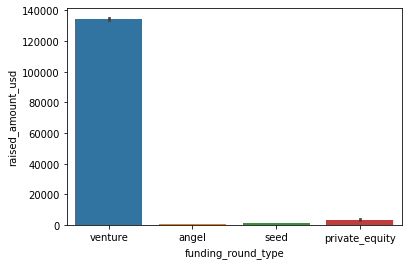

In [178]:
# Total investment of each Funding type
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=df,estimator=np.sum)

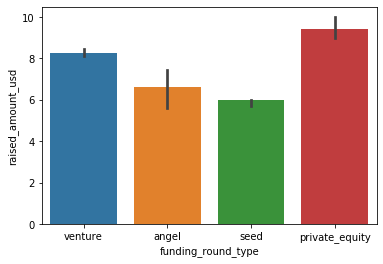

In [179]:
# Average investment of each Funding type
sns.barplot(x='funding_round_type',y='raised_amount_usd',data=df,estimator=np.median)

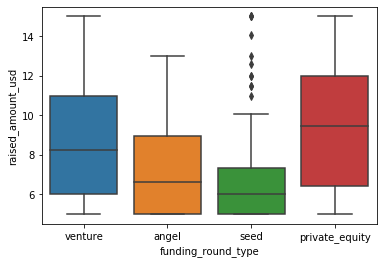

In [180]:
# Box plot for each funding type against the amount of investment
sns.boxplot(x='funding_round_type',y='raised_amount_usd',data=df)

In [181]:
# top9 dataframe is used to plot and find the top 3 english speaking countries based on total amount of investments
top9 = master_frame_venture.sort_values(by='raised_amount_usd',ascending=False)
top9_country = top9.groupby('country_code')
top9_plot = pd.DataFrame(top9_country['raised_amount_usd'].sum().sort_values(ascending=False)[:9])

top9_plot.reset_index(inplace=True)

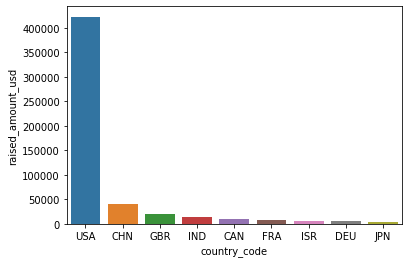

In [182]:
# Plot showing the top 9 countries against the total amount of investments
sns.barplot(x='country_code',y='raised_amount_usd',data=top9_plot)

From the plot, we can identify that the three top english-speaking countries are **USA, GBR, IND**

In [183]:
top9

,company_permalink,funding_round_permalink,funding_round_type,funded_at,raised_amount_usd,permalink,name,homepage_url,category_list,status,country_code,state_code,region,city,founded_at
37569,/organization/freescale,/funding-round/a1495c088d886c8a4f4ce74403b77385,venture,21-10-2006,17600.0,/organization/freescale,Freescale Semiconductor,http://www.freescale.com,Semiconductors,ipo,USA,TX,Austin,Austin,01-01-1953
60207,/organization/mediavast,/funding-round/07e345b61646adffc65946de6a1c88d9,venture,30-06-2003,4700.0,/organization/mediavast,MediaVast,NaN,Advertising|Broadcasting|Content,acquired,USA,NY,New York City,New York,01-01-1999
104166,/organization/uber,/funding-round/1fa1e079dd45f9d615ce1469ed9090fb,venture,04-12-2014,1200.0,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009
104173,/organization/uber,/funding-round/7a617d3521e9a71816c8d5cbcd4c49b0,venture,06-06-2014,1200.0,/organization/uber,Uber,http://www.uber.com,Automotive|Design|Limousines|Public Transporta...,operating,USA,CA,SF Bay Area,San Francisco,01-03-2009
112173,/organization/xiaomi,/funding-round/0022fc712b8a48fc6b7341c6aa3b42a5,venture,22-12-2014,1100.0,/organization/xiaomi,Xiaomi,http://www.mi.com,Consumer Electronics|Mobile,operating,CHN,22,Beijing,Beijing,04-04-2010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53857,/organization/kps-life-sciences,/funding-round/33e6843fc30e6215d0e22ab27a14f624,venture,27-02-2012,0.0,/organization/kps-life-sciences,KPS Life Sciences,http://www.kpsdx.com/,Diagnostics|Medical|Services,operating,DEU,1,Frankfurt,Heidelberg,01-01-2003
34213,/organization/eyes4lives-inc,/funding-round/29d97e05e2dec9d3e78adfac0c3702b8,venture,01-11-2015,0.0,/organization/eyes4lives-inc,"Eyes 4 Lives, Inc.",http://www.Eyes4Lives.com/,NaN,operating,USA,CA,Anaheim,La Habra,01-03-2010
23385,/organization/cool-planet-energy-systems,/funding-round/a863ac9bb720b3e8107c0e1ffde0adf8,venture,07-06-2013,0.0,/organization/cool-planet-energy-systems,Cool Planet Energy Systems,http://www.coolplanet.com,Clean Technology,operating,MEX,32,MEX - Other,Colorado,01-01-2009
23382,/organization/cool-planet-energy-systems,/funding-round/484f367472318b77d433a202f6452785,venture,17-09-2013,0.0,/organization/cool-planet-energy-systems,Cool Planet Energy Systems,http://www.coolplanet.com,Clean Technology,operating,MEX,32,MEX - Other,Colorado,01-01-2009


In [184]:
# Using the top9 dataframe to extract the top 3 main sectors for the top 3 english speaking countries based on totalno. of investments
top9 = master_frame_venture.sort_values(by='raised_amount_usd',ascending=False)
top9_country = top9.groupby('country_code')
top9_country['raised_amount_usd'].sum().sort_values(ascending=False)[:9]

# Different Dataframes for different countries are constructed with the total no. of investments for each main sector
d1_count_plot = pd.DataFrame(d1_count.sort_values(ascending = False)).reset_index()[:3].rename(columns={'main_sector':'USA','raised_amount_usd':'Total No of Investments'})
d2_count_plot = pd.DataFrame(d2_count.sort_values(ascending = False)).reset_index()[:3].rename(columns={'main_sector':'GBR','raised_amount_usd':'Total No of Investments'})
d3_count_plot = pd.DataFrame(d3_count.sort_values(ascending = False)).reset_index()[:3].rename(columns={'main_sector':'IND','raised_amount_usd':'Total No of Investments'})

In [185]:
d1_count_plot

,USA,Total No of Investments
0,Others,3267
1,Cleantech / Semiconductors,2792
2,"Social, Finance, Analytics, Advertising",2086


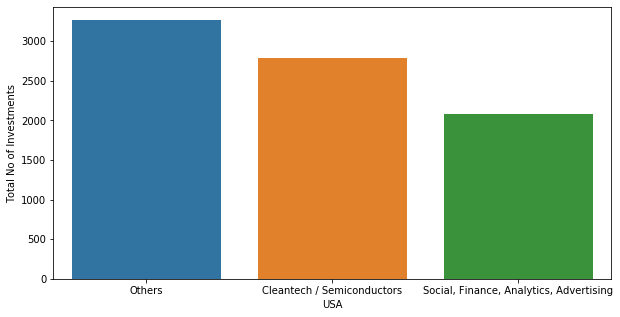

In [186]:
# Plot for country "USA" with the top 3 main sectors based on total no. of investments
plt.figure(figsize = (10,5))
sns.barplot(x='USA',y='Total No of Investments',data=d1_count_plot)

In [187]:
d2_count_plot

,GBR,Total No of Investments
0,Others,168
1,Cleantech / Semiconductors,161
2,"Social, Finance, Analytics, Advertising",109


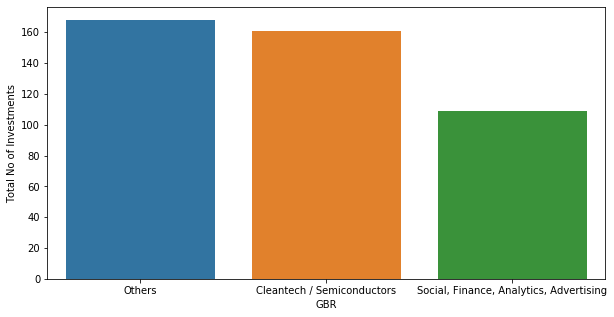

In [188]:
# Plot for country "GBR" with the top 3 main sectors based on total no. of investments
plt.figure(figsize = (10,5))
sns.barplot(x='GBR',y='Total No of Investments',data=d2_count_plot)

In [189]:
d3_count_plot

,IND,Total No of Investments
0,Others,115
1,"News, Search and Messaging",53
2,"Social, Finance, Analytics, Advertising",35


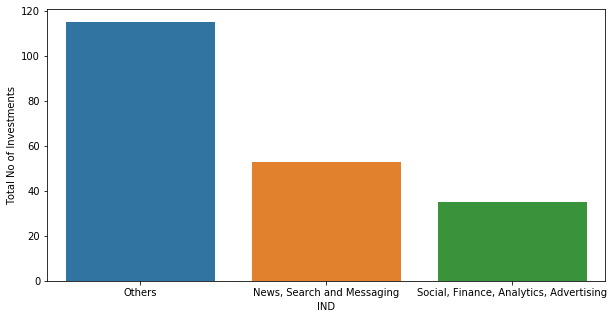

In [190]:
# Plot for country "IND" with the top 3 main sectors based on total no. of investments
plt.figure(figsize = (10,5))
sns.barplot(x='IND',y='Total No of Investments',data=d3_count_plot)